26378.31674182415
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 21.483334]
 [225.66667 ]]


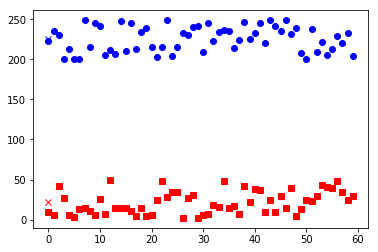

In [1]:
%matplotlib inline
#22.3.1 随机生成一组数据，使用函数cv2.kmeans()对其分类
import cv2
import numpy as np
import matplotlib.pyplot as plt
#随机生成两组数据
#生成60个值在[0,50]内的xiaoMI直径数据
xiaoMI=np.random.randint(0,50,60)
#生成60个值在[200,250]内的daMI直径数据
daMI=np.random.randint(200,250,60)
#将xiaoMI和daMI组合为MI
MI=np.vstack((xiaoMI,daMI))
#使用reshape函数将其转换成(120,1)
MI=MI.reshape(120,1)
#将MI转换成float32类型
MI=np.float32(MI)
#调用kmeans模块
#设置参数criteria的值
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,0.1)
#设置参数flags的值
flags=cv2.KMEANS_RANDOM_CENTERS
#调用函数kmeans
retval,bestLabels,centers=cv2.kmeans(MI,2,None,criteria,10,flags)
#打印返回值
print(retval)
print(bestLabels)
print(centers)
#获取分类及如果
XM=MI[bestLabels==0]
DM=MI[bestLabels==1]
#绘制分类结果
#绘制原始数据
plt.plot(XM,"rs")
plt.plot(DM,"bo")
#绘制中心点
plt.plot(centers[0],"rx")
plt.plot(centers[1],"bx")
plt.show()

3496.0666761398315
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[51.46667  50.166668]
 [10.466667 10.033334]]


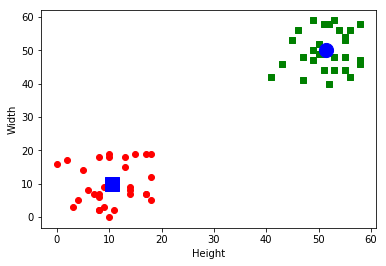

In [2]:
#22.3.2 有一堆米粒，按照长度和宽度对它们分类，XM的长和宽都在[0,20]内，DM的长和宽都在[40,60]内
import cv2
import numpy as np
import matplotlib.pyplot as plt
xiaomi=np.random.randint(0,20,(30,2))
dami=np.random.randint(40,60,(30,2))
MI=np.vstack((xiaomi,dami))
MI=np.float32(MI)
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,0.1)
flags=cv2.KMEANS_RANDOM_CENTERS
ret,label,center=cv2.kmeans(MI,2,None,criteria,10,flags)
#打印返回值
print(ret)
print(label)
print(center)
XM=MI[label.ravel()==0]
DM=MI[label.ravel()==1]
#绘制分类结果数据及中心点
plt.scatter(XM[:,0],XM[:,1],c="g",marker="s")
plt.scatter(DM[:,0],DM[:,1],c="r",marker="o")
plt.scatter(center[0,0],center[0,1],200,c="b",marker="o")
plt.scatter(center[1,0],center[1,1],200,c="b",marker="s")
plt.xlabel("Height"),plt.ylabel("Width")
plt.show()

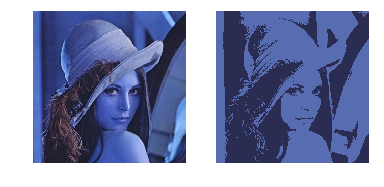

In [3]:
#22.3.3 使用函数cv2.kmeans()将灰度图像处理为只有两个灰度级的二值图像
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread("lena.png",-1)
#使用reshape将一个像素点的RGB值作为一个单元处理
data=img.reshape((-1,3))
#转换成kmens可以处理的数据类型
data=np.float32(data)
#调用Kmeans模块
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,10,1.0)
flags=cv2.KMEANS_RANDOM_CENTERS
ret,label,center=cv2.kmeans(data,2,None,criteria,10,flags)
#转换为uint8数据类型，将每个像素点都赋值为当前分类的中心点像素
center=np.uint8(center)
#使用center内的值替换原像素点的值
res1=center[label.flatten()]
#使用reshape调整替换后的图像
res2=res1.reshape((img.shape))
#显示处理结果
plt.subplot(121)
plt.imshow(img)
plt.axis("off")
plt.subplot(122)
plt.imshow(res2)
plt.axis("off")
cv2.imshow("original",img)
cv2.imshow("result",res2)
cv2.waitKey()
cv2.destroyAllWindows()